### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Fall 2018 ###

# DoIT Help Desk Employee Scheduling Optimization #

#### Meggie Cook (mcook24@wisc.edu, 9074490211)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

In this project, our goal is to find the optimization model that determines the optimal employee schedule which minimizes the cost while maximizing employee satisfaction, all at the same time adhering to the constraints set by the position restrictions.

The DoIT Help Desk is the IT Help Desk at University of Wisconsin-Madison, which has around 60 to 80 student employees on any given semester. The number of employees makes the process of shift scheduling difficult. Currently the employee schedule building is a tedious manual process done by several of the higher level employees. My motivation is to automate this process according to the constraints specified by our supervisor, Steve Schroeder. 

<img src = "schedule.png" style="height: 400px;"></img>

There are several requirements that exist when scheduling the employee shifts. The work hours are from 7AM to 11PM every day of the week, and each shift is divided into 30 minute blocks (thus there are 32 shift blocks per day). Each employee has to work between 10 to 15 hours a week, and an employee cannot work for more then 8 hours a day.The shifts can be non-consecutive.

There are 4 training levels for the employees; General, Advanced, Chat/Email, and Quality Assurance. The pay rates are $\$$9.75, $\$$10.25, $\$$10.50, and $\$$11.75 respectively. Your level increases the more you train. The higher level employees can work a lower level shift, but cannot happen vice versa. For each shift block there must be 1 Quality Assurance and Chat/Email agents, and 1 or more Advanced and General agents.

Furthermore, when the employees submit their availability for the semester, they mark each shift into 3 categories; Available (in Green), Prefer not to work but Available (Yellow), and Unavailable (Red). An example of the availability data is shown below. We would want to try to schedule the employees to the Available blocks as much as possible.

<img src = "available.png" style="height: 400px;"></img>

The availability and training level data gathered for this project is the actual anonymous data for employees in Fall 2018. The data is contained in a .csv file. There will be 8 files; the first 8 will contain the data of 

This type of problem is called a Multi-Skill Hierarchical Scheduling Problem.

## 2. Mathematical model ##

### 2.1 Assumptions ###

Before we can begin developing the Optimization model, we must clarify a few assumptions we will make when creating this model.
* First
* Second

### 2.2 Notation ###

First, we must define all the notation and numerical values we will use to creating the schedule.

$I: $ The set of shifts per day, indexed by $j ∈ J = {1, 2, ..., n} $ <br>
There are 16 hours in a work day (from 7AM to 11PM), and each shift is broken up into 30 minute blocks. Thus, there will be 32 shifts per day. 

$J: $ The set of student employees working in the Help Desk, indexed by $i ∈ I = {1, 2, ..., m} $

$D: $ The set of working days per week, indexed by $d ∈ D = {1, ..., 7} $ <br>
Each day has the same hours, and the store opens 7 days a week.

$L: $ The training levels of employee, $l ∈ L = {1, 2, 3, 4} $ <br>
Each of the categories represent (by order) Quality Assurance Agent, Chat/Email Agent, Advanced Phone Agent, and General Phone Agent

$C_l: $ The pay rate per hour for employee working shift type l, $C _l = {11.75, 10.50, 10.25, 9.75} $ <br>
$l_1, l_2 ∈ L, l_1 < l_2 ⇒ C_{l_1} > C_{l_2}$

We will also have binary variables which express if an agent has already been trained for a level or not

$
p_j = \begin{cases}
  1, & \text{if agent j is trained for QA (Level 1)} \\
  0, & \text{otherwise}.
\end{cases}
$

$
q_j = \begin{cases}
  1, & \text{if agent j is trained for Chat/Email (Level 2)} \\
  0, & \text{otherwise}.
\end{cases}
$

$
r_j = \begin{cases}
  1, & \text{if agent j is trained for Advanced Agent (Level 3)} \\
  0, & \text{otherwise}.
\end{cases}
$

We are not creating a binary variable which determines if an agent is a General agent, because all agents are able to take Level 4 shifts, so there is no need to specify who has only been trained as Level 4. (The method of defining the hierarchy will be explained further in the constraints sections).

### 2.3 Availability/ Shift Weighting ###

Each employees submit their availabillities for the semester, listed in this form:

$
S_{ijd} = \begin{cases}
  TRUE, & \text{if agent j prefers to work on shift i on day d} \\
  maybe, & \text{if agent j is available but prefers not to work on shift i on day d} \\
  FALSE, & \text{if agent j is unavailable on shift i on day d}.
\end{cases}
$

To form the problem, we will split this data into two matrices: Available and Preferable.

$
A_{ijd} = \begin{cases}
  1, & \text{if agent j is available on shift i on day d} \\
  0, & \text{if agent j is unavailable on shift i on day d}.
\end{cases}
$

$
P_{ijd} = \begin{cases}
  1, & \text{if agent j prefers to work on shift i on day d} \\
  0, & \text{if agent j does not prefer to work on shift i on day d}.
\end{cases}
$

Our goal is to try to schedule the shifts where the employee finds it to be Available and Preferable. To do so, we will create a weighted matrix so that the preferable shifts are upweighted (using the weighting factor a) and non-preferable shifts are downweighted (using weighting factor b).

### 2.4 Decision Variables ###

There are 4 Decision Variables we will use for this problem.

$
w_{ijd} = \begin{cases}
  1, & \text{if agent j is scheduled on a QA shift i on day d} \\
  0, & \text{otherwise}.
\end{cases}
$

$
x_{ijd} = \begin{cases}
  1, & \text{if agent j is scheduled on a Chat/Email shift i on day d} \\
  0, & \text{otherwise}.
\end{cases}
$

$
y_{ijd} = \begin{cases}
  1, & \text{if agent j is scheduled on an Advanced Agent shift i on day d} \\
  0, & \text{otherwise}.
\end{cases}
$

$
z_{ijd} = \begin{cases}
  1, & \text{iif agent j is scheduled on a General Agent shift i on day d} \\
  0, & \text{otherwise}.
\end{cases}
$

### 2.5 Constraints ###

We will express the multiple requirements for working in the Help Desk as constraints

Work between 10~15 hours per week

$$\sum_{i∈I} \sum_{d∈D} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≤  30 \:∀j∈J $$
$$\sum_{i∈I} \sum_{d∈D} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≥ 20 \:∀j∈J$$

Must not work more than 8 hours a day

$$\sum_{i∈I} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≤  16 \:∀j∈J, d∈D$$

Exactly one QA and Chat/Email agent

$$\sum_{j∈J} p_j w_{ijd} =  1 \:∀i∈I, d∈D$$
$$\sum_{j∈J} q_j x_{ijd} =  1 \:∀i∈I, d∈D$$

One or more Phone agents (Advanced and General)

$$\sum_{j∈J} r_j y_{ijd} ≥  1 \:∀i∈I, d∈D$$
$$\sum_{j∈J} z_{ijd} ≥  1 \:∀i∈I, d∈D$$

Business hours: 6 or more phone agents
Sub-Business hours: 4 or more phone agents
$$\sum_{j∈J} y_{ijd} + z_{ijd} ≥  6 \:\text{for } i = 6,7,...,19,20 \:∀d∈D$$
$$\sum_{j∈J} y_{ijd} + z_{ijd} ≥  4 \:\text{for } i = 3,...,5 \:∀d∈D$$
$$\sum_{j∈J} y_{ijd} + z_{ijd} ≥  4 \:\text{for } i = 21,...,27 \:∀d∈D$$

SOS Constraint
$$\sum_{i∈I} \sum_{j∈J} \sum_{d∈D} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≤  1 $$

### 2.6 Objective ###

We have two main objectives in this model.

First, we want to minimize the cost spent for the workforce.

Second, we want to maximize the employee satisfaction

### 2.7 Standard Form ###

$$\begin{aligned}
  \underset{x \in \mathbb{R^n}}{\text{maximize}}\qquad& f_0(x) \\
    \text{subject to:}\qquad& f_i(x) \le 0 && i=1,\dots,m\\
    & h_j(x) = 0 && j=1,\dots,r
    \end{aligned}$$
    
This model is a Mixed Integer Program.

## 3. Solution ##


First, we will define the Notation & Information about Pay Rate, Training Level of each agent, and the length and amount of each shift. The training level is loaded from the file training.csv

In [4]:
using JuMP
# Pay rate per hour tor training level 1 to 4
C = [11.75 10.50 10.25 9.75]

# Number of workdays per week
D = 7

# Number of Shifts
I = 32

# Load training level data
training = readcsv("training.csv")

# Number of employees
J = size(training,1) - 1

p = zeros(Int8, J) # Level 1
q = zeros(Int8, J) # Level 2
r = zeros(Int8, J) # Level 3

for j = 2:J+1
    if training[j,2] == 4
        p[j-1] = 1
    elseif training[j,2] == 3
        q[j-1] = 1
    elseif training[j,2] == 2
        r[j-1] = 1
    end
end

63


Then we will create the Availability and Preference Matrix by reading the availability data submitted by all the employees as a .csv file.

In [5]:
using JuMP

# Availability Matrix
A = zeros(Int8, I, J, D)

# Preference Matrix
P = zeros(Int8, I, J, D)

# Read availability information from csv files
Sun = readcsv("Sunday.csv")
Mon = readcsv("Monday.csv")
Tue = readcsv("Tuesday.csv")
Wed = readcsv("Wednesday.csv")
Thur = readcsv("Thursday.csv")
Fri = readcsv("Friday.csv")
Sat = readcsv("Saturday.csv")
raw = [Sun[:,:], Mon[:,:], Tue[:,:], Wed[:,:], Thur[:,:], Fri[:,:], Sat[:,:]]

# Fill in Availability and Preference matrix
for d = 1:D
    for i = 3:I+2
        for j = 2:J+1
            if raw[d][j,i] == "TRUE"
                A[i-2, j-1, d] = 1
                P[i-2, j-1, d] = 1
            elseif raw[d][j,i] == "maybe"
                A[i-2, j-1, d] = 1
            end
        end
    end
end

After collecting the Availability and the Preference Matrix, now we will calculate the alpha values and the beta values for each agent and each then. Then, we will use those values to create a weighted preference matrix which will favor the Available blocks (marked in Green) than the Not Preferable blocks (marked in Yellow). It will also ensure that agents will not be schedules for blocks which they are Unavailable (marked in Red).

In [7]:
# Calculate weighted preferences

a = zeros(J,D) # Alpha values
b = zeros(J,D) # Beta values

# Calculate the alpha and beta values for each agent and each day
for d = 1:D
    for j = 1:J
        # If Sum of Availabilities is 0, or Sum of Availabilities == Sum of Preferences, leave the value of 
        # Alpha and Beta as 0 
        if sum(A[i,j,d] for i=1:I) != 0 && sum(A[i,j,d] for i=1:I) != sum(P[i,j,d] for i=1:I)
            a[j,d] = (sum(A[i,j,d] for i=1:I) -  sum(P[i,j,d] for i=1:I)) / sum(A[i,j,d] for i=1:I)
            b[j,d] = a[j,d] * (sum(P[i,j,d] for i=1:I) / (sum(A[i,j,d] for i=1:I) -  sum(P[i,j,d] for i=1:I)))
        end
    end
end

# Create the weighted preference matrix
WP = zeros(I,J,D)

for d = 1:D
    for i = 1:I
        for j = 1:J
            if A[i,j,d] == 1 && P[i,j,d] == 1
                WP[i,j,d] = 1 + a[j,d]
            elseif A[i,j,d] == 1 && P[i,j,d] == 0
                WP[i,j,d] = 1 - b[j,d]
            end
        end
    end
end

Now we will solve the problem by defining all the decision variables and constraints.

In [40]:
using JuMP, Cbc
m = Model(solver = CbcSolver())

# ----------------------- Variables --------------------------
@variable(m, w[1:I, 1:J, 1:D], Bin) # Level 1 shifts
@variable(m, x[1:I, 1:J, 1:D], Bin) # Level 2 shifts
@variable(m, y[1:I, 1:J, 1:D], Bin) # Level 3 shifts
@variable(m, z[1:I, 1:J, 1:D], Bin) # Level 4 shifts

# ----------------------- Constraints --------------------------

# Total number of shift per week must be between 10 to 15 hours
for j = 1:J
    @constraint(m, sum(w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d] for i = 1:I, d = 1:D) <= 30)
    @constraint(m, sum(w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d] for i = 1:I, d = 1:D) >= 20)
end

# Employee must not work more than 8 hours per day
for j = 1:J
    for d = 1:D
        @constraint(m, sum(w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d] for i = 1:I) <= 16)
    end
end

# Number of agents working per shift
for i = 1:I
    for d = 1:D
        # There will be only 1 agent for Quality Assurance and Chat/Email
        @constraint(m, sum(p[j] * w[i,j,d] for j = 1:J) == 1)
        @constraint(m, sum((p[j] + q[j]) * x[i,j,d] for j = 1:J) == 1)
        
        # There will be 1 or more agents for Advanced and General agents
        @constraint(m, sum((p[j] + q[j] + r[j]) * y[i,j,d] for j = 1:J) >= 1)
        @constraint(m, sum(z[i,j,d] for j = 1:J) >= 1)
        
        #If it's business hours, there will be at leas 6 phone agents per shift
        if i > 5 && i < 21
            @constraint(m, sum(y[i,j,d] + z[i,j,d] for j = 1:J) >= 6)
        # For a few hours before and after business hours, there will be at least 4 phone 
        # agents per shift
        elseif i > 20 && i < 28 || i > 2 && i < 6
            @constraint(m, sum(y[i,j,d] + z[i,j,d] for j = 1:J) >= 4)
        end
    end
end

# SOS constraint: One agent cannot work multiple types of shifts at the same time
for i = 1:I
    for j = 1:J
        for d = 1:D
            @constraint(m, w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d] <= 1)
        end
    end
end

# ----------------------- Objectives --------------------------

# Minimize the overall cost and Maximize Employee Satisfaction to schedule the shifts
@objective(m, Min, sum(C[1] * w[i,j,d] + C[2] * x[i,j,d] + C[3] * y[i,j,d] + C[4] * z[i,j,d] for i = 1:I, j = 1:J, d = 1:D) 
            - sum((w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d]) * WP[i,j,d] for i = 1:I, j = 1:J, d = 1:D))

status = solve(m)
println(getobjectivevalue(m))

12962.183427795586


## 4. Results and discussion ##

We will display the results in tables (for the schedule itself) and graphs (to compare which agent has how many hours per week).

### 4.1 Training Level Table ###
First, we will show the different training levels of the agents

In [9]:
using DataFrames
L1 = [j for j = 1:J if p[j] == 1]
L2 = [j for j = 1:J if q[j] == 1]
L3 = [j for j = 1:J if r[j] == 1]
L4 = [j for j = 1:J if p[j] != 1 && q[j] != 1 && r[j] != 1]
                                                
Agents = []
push!(Agents, L1)
push!(Agents, L2)
push!(Agents, L3)
push!(Agents, L4)                                                
Position = ["QA", "Chat/Email", "Advanced", "General"]
                                                
df = DataFrame(pos = Position, agnt = Agents)
names!(df, [Symbol("Positions"), Symbol("Agents")])
showall(df)

4×2 DataFrames.DataFrame
│ Row │ Positions  │ Agents                                                                                       │
├─────┼────────────┼──────────────────────────────────────────────────────────────────────────────────────────────┤
│ 1   │ QA         │ [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 26, 35, 36] │
│ 2   │ Chat/Email │ [6, 25, 27, 28, 29, 30, 31, 33, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 55, 60]              │
│ 3   │ Advanced   │ [20, 34, 37, 38, 39, 47, 51, 52, 53, 54, 56, 62]                                             │
│ 4   │ General    │ [32, 57, 58, 59, 61, 63]                                                                     │

### 4.2 Schedule Table Visualization###

In [211]:
using DataFrames
Time = ["7:00", "7:30", "8:00", "8:30", "9:00", "9:30", "10:00", "10:30", "11:00", "11:30", "12:00", "12:30", "13:00",
        "13:30", "14:00", "14:30", "15:00", "15:30", "16:00", "16:30", "17:00", "17:30", "18:00", "18:30", "19:00", 
        "19:30", "20:00", "20:30", "21:00", "21:30", "22:00", "22:30"]
Days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] 

# Write schedule in a table
for d = 1:D
    QA = []
    Chat = []
    Advanced = []
    General = []

    # Find the employees that are scheduled for each shift
    for i = 1:I
        push!(QA,[j for j = 1:J if getvalue(w[i,j,d]) == 1])
        push!(Chat,[j for j = 1:J if getvalue(x[i,j,d]) == 1])
        push!(Advanced, [j for j = 1:J if getvalue(y[i,j,d]) == 1])
        push!(General, [j for j = 1:J if getvalue(z[i,j,d]) == 1])
    end
    
    println(Days[d])
    df = DataFrame(time = Time, level1 = QA, level2 = Chat, level3 = Advanced, level4 = General)
    names!(df, [Symbol("Time"), Symbol("QA"), Symbol("Chat/Email"), Symbol("Advanced"), Symbol("General")])
    showall(df)                                                    
    println()
    println()
end

Sunday
32×5 DataFrames.DataFrame
│ Row │ Time  │ QA   │ Chat/Email │ Advanced │ General              │
├─────┼───────┼──────┼────────────┼──────────┼──────────────────────┤
│ 1   │ 7:00  │ [17] │ [5]        │ [39]     │ [60]                 │
│ 2   │ 7:30  │ [5]  │ [60]       │ [39]     │ [17]                 │
│ 3   │ 8:00  │ [17] │ [30]       │ [60]     │ [5, 39, 57]          │
│ 4   │ 8:30  │ [5]  │ [30]       │ [4]      │ [17, 57, 60]         │
│ 5   │ 9:00  │ [17] │ [5]        │ [4]      │ [26, 30, 57]         │
│ 6   │ 9:30  │ [36] │ [23]       │ [38]     │ [5, 21, 25, 26, 30]  │
│ 7   │ 10:00 │ [26] │ [45]       │ [38]     │ [2, 5, 21, 39, 63]   │
│ 8   │ 10:30 │ [21] │ [45]       │ [26]     │ [2, 10, 11, 38, 39]  │
│ 9   │ 11:00 │ [26] │ [10]       │ [13]     │ [2, 11, 17, 20, 45]  │
│ 10  │ 11:30 │ [26] │ [21]       │ [17]     │ [2, 13, 28, 57, 63]  │
│ 11  │ 12:00 │ [13] │ [28]       │ [20]     │ [2, 17, 21, 26, 57]  │
│ 12  │ 12:30 │ [2]  │ [28]       │ [42]     │ [10, 16, 2

│ 15  │ 14:00 │ [23] │ [35]       │ [48]     │ [6, 11, 15, 36, 46]  │
│ 16  │ 14:30 │ [11] │ [6]        │ [15]     │ [36, 41, 46, 48, 63] │
│ 17  │ 15:00 │ [15] │ [41]       │ [46]     │ [11, 27, 37, 61, 63] │
│ 18  │ 15:30 │ [7]  │ [41]       │ [31]     │ [11, 15, 25, 27, 63] │
│ 19  │ 16:00 │ [15] │ [11]       │ [25]     │ [7, 27, 31, 41, 63]  │
│ 20  │ 16:30 │ [14] │ [27]       │ [25]     │ [7, 11, 20, 31, 41]  │
│ 21  │ 17:00 │ [14] │ [31]       │ [27]     │ [7, 20, 25]          │
│ 22  │ 17:30 │ [11] │ [41]       │ [7]      │ [25, 31, 63]         │
│ 23  │ 18:00 │ [11] │ [31]       │ [25]     │ [7, 16, 41]          │
│ 24  │ 18:30 │ [16] │ [25]       │ [41]     │ [31, 37, 63]         │
│ 25  │ 19:00 │ [12] │ [16]       │ [41]     │ [25, 31, 63]         │
│ 26  │ 19:30 │ [12] │ [31]       │ [41]     │ [14, 16, 25]         │
│ 27  │ 20:00 │ [14] │ [25]       │ [31]     │ [12, 20, 32]         │
│ 28  │ 20:30 │ [12] │ [14]       │ [20]     │ [32]                 │
│ 29  │ 21:00 │ [12]

│ 29  │ 21:00 │ [4]  │ [43]       │ [52]     │ [53]                 │
│ 30  │ 21:30 │ [10] │ [24]       │ [52]     │ [53]                 │
│ 31  │ 22:00 │ [10] │ [24]       │ [52]     │ [53]                 │
│ 32  │ 22:30 │ [24] │ [43]       │ [53]     │ [52]                 │



### 4.3 Weekly Work Hours per Agent ###



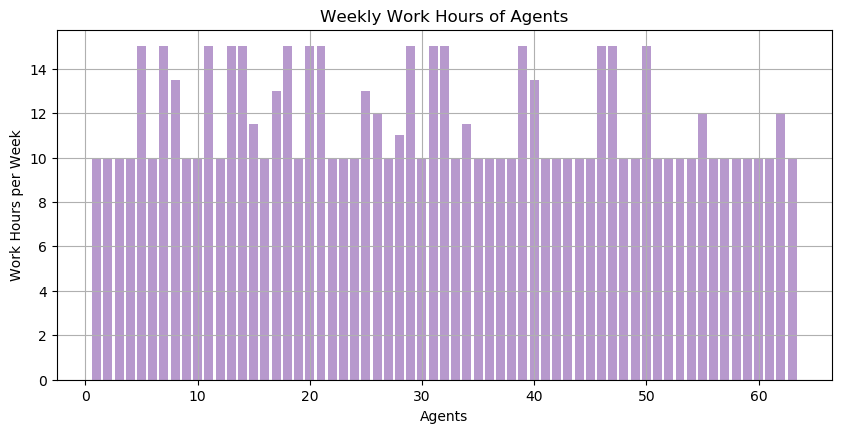

PyObject Text(24.000000000000007, 0.5, 'Work Hours per Week')

In [170]:
using PyPlot

numAgents = []
for j = 1:J
    push!(numAgents, j)
end

# Calculate the total working hours per week for each agent
hoursPerWeek = []
for j = 1:J
   numHours = sum(getvalue(w[i,j,d]) + getvalue(x[i,j,d]) + getvalue(y[i,j,d]) + getvalue(z[i,j,d]) for i = 1:I, d = 1:D) / 2
   push!(hoursPerWeek, numHours)
end

fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(numAgents,hoursPerWeek,color = "indigo", align="center",alpha=0.4)
axis("tight")
title("Weekly Work Hours of Agents")
grid("on")
xlabel("Agents")
ylabel("Work Hours per Week")

### 4.4 Ratio of Shift Type per Week ###

We will represent this information in a pie chart. Since there are too many employees to display all the graphs, I decided to limit graphing the shift ratio information to two agents; Agent 15 and Agent 46. The reason why I chose these two agents in particular is that the two represents the two trends that occured during scheduling. Agent 15 is a Level 1 agent (QA), while Agent 46 is a Level 2 Agent (Chat/Email).

In [182]:
using PyPlot
function shiftRatio(j)
    labels = ["QA";"Chat/Email";"Advanced";"General"]
    colors = ["crimson";"yellowgreen";"Yellow";"lightblue"]
    sizes = [sum(getvalue(w[i,j,d]) for i=1:I, d=1:D); sum(getvalue(x[i,j,d]) for i=1:I, d=1:D);
                sum(getvalue(y[i,j,d]) for i=1:I, d=1:D); sum(getvalue(z[i,j,d]) for i=1:I, d=1:D)]
    explode = zeros(length(sizes))
    font = Dict("fontname"=>"Sans","weight"=>"semibold");

    p = pie(sizes, labels=labels, shadow=true, startangle=90, colors=colors, autopct="%1.1f%%", textprops=font)
    axis("equal")
    title(string("Ratio of shift types per week for Agent ", j))
    return
end

shiftRatio (generic function with 1 method)

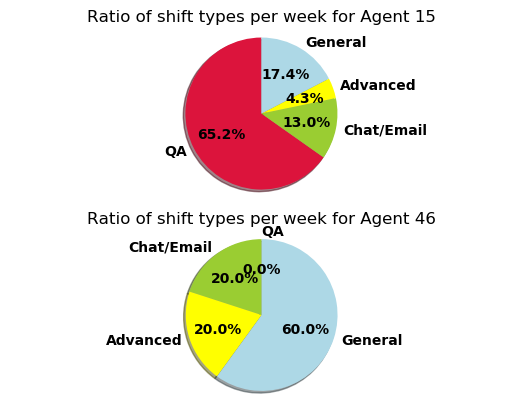

In [206]:
subplot(211)
shiftRatio(15)
subplot(212)
shiftRatio(46)

### 4.5 Total Cost per Week ###
The total cost that will be paid to the employees

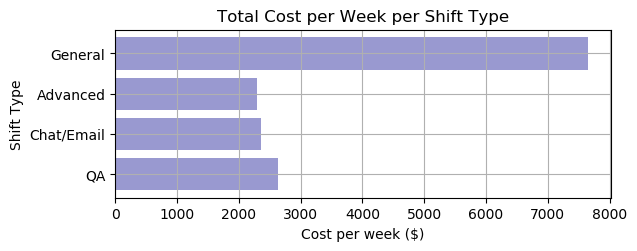

Total cost to run Help Desk in optimal schedule: $14924.0


In [213]:
QAPay = C[1] * sum(getvalue(w[i,j,d]) for i = 1:I, j = 1:J, d = 1:D);
ChatPay = C[2] * sum(getvalue(x[i,j,d]) for i = 1:I, j = 1:J, d = 1:D);
AdvPay = C[3] * sum(getvalue(y[i,j,d]) for i = 1:I, j = 1:J, d = 1:D);
GenPay =  C[4] * sum(getvalue(z[i,j,d]) for i = 1:I, j = 1:J, d = 1:D);

x_axis = []
push!(x_axis,"QA")
push!(x_axis,"Chat/Email")
push!(x_axis,"Advanced")
push!(x_axis,"General")

y_axis = []
push!(y_axis,QAPay)
push!(y_axis,ChatPay)
push!(y_axis,AdvPay)
push!(y_axis,GenPay)

subplot(212)
b = barh(x_axis,y_axis,color="darkblue",align="center",alpha=0.4)
axis("tight")
title("Total Cost per Week per Shift Type")
grid("on")
xlabel("Cost per week (\$)")
ylabel("Shift Type")

TotCost = QAPay + ChatPay + AdvPay + GenPay;
println("Total cost to run Help Desk in optimal schedule: \$", TotCost)

### 4.6 Limitations ###

## 5. Conclusion ##

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.

If I had to repeat this project again, I would try to take in account of the demands for each shift. I was not able to collect the data for the number of calls per shift. The call traffic can differ a lot between the time and day, for example Business Hours (9 to 5) have more calls than other hours, Weekdays more than Weekends and so on). If there are too few employees scheduled in a busy shift the Help Desk will get overwhelmed, and will lead to dissatisfaction among employees. 

Thus, what I would do is to calculate the average amount of calls received in a particular shift and adjust the demand so that the amount of calls per employee would be roughly similar across the board. 

Furthermore, in the real Help Desk certain agents are Team Leads, who have another type of shift called Project Hours, which allows them to do additional work for the Help Desk (such as developing internal applications, writing technical documentation, training new agents or even scheduling shifts). They are supposed to be 50% of the shifts for a week. If I had the data for call demands, I would add this feature and try to schedule the shifts when there are less calls (so the Help Desk will be impacted less).